# Gaussian Process

# Steps
1. Define the kernel
2.  a. Apply the Kernel to Train Data ($K_{yy-Cov}$)

    b. Calculate $K_{yy}$ by $K_{yy} = K_{yy-Cov} + \sigma_n^2 I$
    
3.  a. Apply the kernel to Test Data ($K_{ff-Cov}$)

    b. Calculate $K_{ff}$ by $K_{ff} = K_{ff-Cov} + \sigma_n^2 I$
    
    c. Calculate the prior distribution for the Test Data
    
4.  a. Apply the kernel to a mix of Train-Test Data 
    
    b. Calculate the mean and standard deviation of for the test data
    
5. Calculate the posterior based on the sampled test data


In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [2]:
# Step 1
# Define the Gaussian Kernal
def Kernel(x, y, length_scale, variance):
    Kernel = variance * (np.exp(-.5*(x.reshape((-1, 1)) - y.reshape((1, -1))) ** 2 / length_scale ** 2))
    return Kernel

In [3]:
def GP(X_train, X_test, N_test, Noise_Std, Number_of_Function_to_Sample, length_scale, variance):
    # Step 2a
    Kyy_Cov = Kernel(X_train, X_train, length_scale, variance =1)
    # Step 2b
    Kyy_L = np.linalg.cholesky(Kyy_Cov + Noise_Std ** 2 * np.eye(len(X_train)))
    # Step 3a
    Kff_Cov = Kernel(X_test,  X_test,  length_scale, variance =1)
    # Step 3b
    Kff_L = np.linalg.cholesky(Kff_Cov + Noise_Std ** 2 * np.eye(len(X_test)))
    # Step 3c
    X_test_prior = Kff_L @ np.random.normal(size=(N_test,Number_of_Function_to_Sample))


    # Step 4a
    Kfy_Cov = Kernel(X_train, X_test,  length_scale, variance =1)

    # Step 4b
    Kfy_L = np.linalg.solve(Kyy_L, Kfy_Cov)
    ## Mean
    mean = (Kfy_L.T @ np.linalg.solve(Kyy_L, y_train)).reshape((N_test,))
    # Standard Deviation
    stdv = np.sqrt(np.diag(Kff_Cov) - np.sum(Kfy_L ** 2, axis=0))

    # Step 5
    # Drawing posterior Samples
    Kff_L_posterior = np.linalg.cholesky(Kff_Cov + Noise_Std * np.eye(N_test) - np.dot(Kfy_L.T, Kfy_L))

    # Calculate posterior distribution from the sample
    X_test_posterior = mean.reshape(-1,1) + (Kff_L_posterior @ np.random.normal(size=(N_test,Number_of_Function_to_Sample)))
    
    return mean, stdv, X_test_prior, X_test_posterior

In [4]:
def Plotting_GP_Model(X_train, y_train, X_test, Sampled_Function, mean, stdv, Title, posterior = False):
    # For the Prior Case
    plt.figure(figsize=(16,8))
    plt.plot(X_train, y_train, 'ko', label='Training Point')
    plt.plot(X_test, Sampled_Function,'o-', label= Title + ' Fits')
    if posterior:
        plt.gca().fill_between(X_test.flat, mean - 3 * stdv, mean + 3 * stdv, color="#dddddd")
    plt.title(Title + ' Fit')
    plt.legend()

In [24]:
# Create data (We can test using a sin function) 
# Training Data
# Noiseless training data
N_train = 50
X_train = np.sort(4 * np.pi * np.random.rand(N_train, 1), axis=0)
y_train = np.sin(X_train)*.5

# Number of Test Data
N_test  = 30
# Test Data
X_test  = np.linspace(0, 4*np.pi, N_test).reshape([N_test,1])

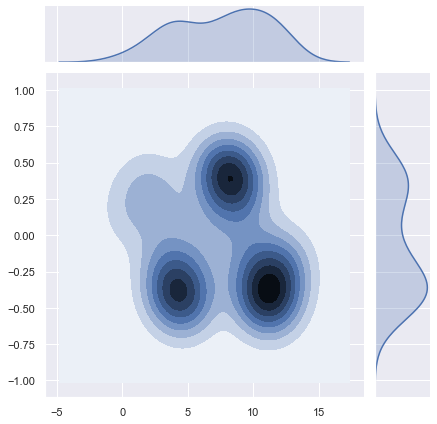

In [16]:
# Check the joint probability Distribution
sns.jointplot(x=X_train, y=y_train,kind="kde")

In [25]:
# Define the parameters
Number_of_Function_to_Sample          = 3
Noise_Std                             = 0.005
length_scale                          = 0.5
variance                              = .1

In [26]:
# Calculate the GP
mean, stdv, X_test_prior, X_test_posterior = GP(X_train, X_test, N_test, Noise_Std, Number_of_Function_to_Sample, length_scale, variance)

# Let's Plot them and see

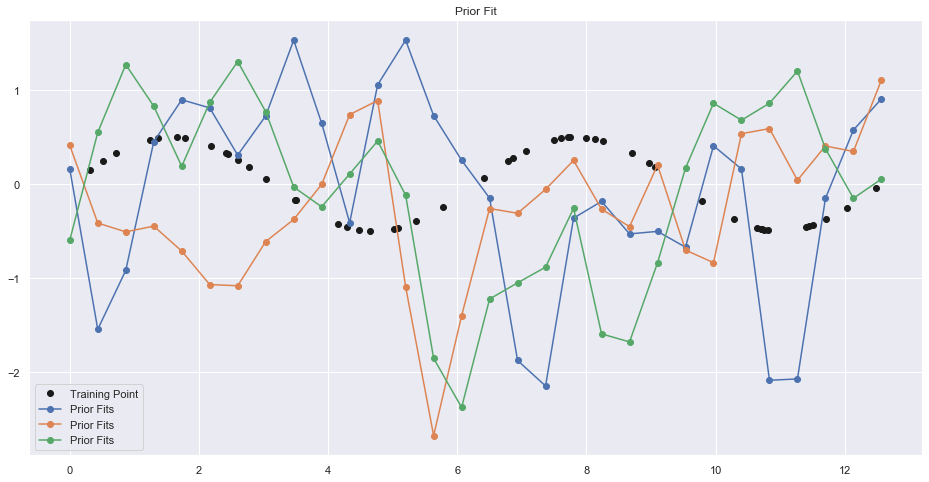

In [27]:
# For the Prior Case
Plotting_GP_Model(X_train, y_train, X_test, X_test_prior, mean, stdv, Title = 'Prior', posterior = False)

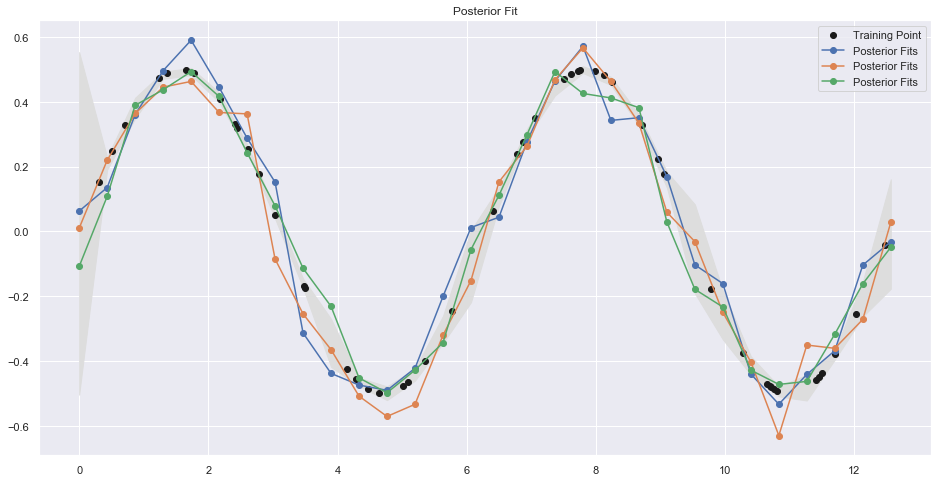

In [28]:
# For the Posterior Case
Plotting_GP_Model(X_train, y_train, X_test, X_test_posterior, mean, stdv, Title = 'Posterior', posterior = True)